In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [318]:
df=pd.read_csv('flipkartMobileData.csv')


In [319]:
df.columns

Index(['CGtC98 href', 'DByuf4 src', 'uu79Xy', 'model', 'rated', 'Rza2QY src',
       'rate', 'hG7V+4', 'reviews', 'd2', 'd3', 'd4', 'd4.1', 'J+igdf 5',
       'J+igdf 6', 'Nx9bqj', 'yRaY8j', 'UkUFwK', 'yiggsN', '_0CSTHy src',
       'yiggsN 2', 'yiggsN 3', 'yiggsN 4', 'yiggsN 5'],
      dtype='object')

In [320]:
df=df.drop(columns=['CGtC98 href', 'DByuf4 src', 'uu79Xy','Rza2QY src','hG7V+4','yiggsN', '_0CSTHy src', 'yiggsN 2','yiggsN 4','yiggsN 5','yiggsN 3'])

In [321]:
df.head(2)

,model,rated,rate,reviews,d2,d3,d4,d4.1,J+igdf 5,J+igdf 6,Nx9bqj,yRaY8j,UkUFwK
0,"Nothing Phone (3a) (Blue, 128 GB)",4.5,"13,020 Ratings","1,404 Reviews",8 GB RAM | 128 GB ROM,17.2 cm (6.77 inch) Full HD+ Display,50MP (Main) + 50MP (2X Tele Photo) + 8MP (Ultr...,5000 mAh Battery,7s Gen3 Processor,1 Year Manufacturing Warranty,"₹24,999","₹27,999",10% off
1,"POCO C71 (Desert Gold, 64 GB)",4.2,716 Ratings,59 Reviews,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200 mAh Battery,Unisoc T7250\nMax clock speed: \n2 x A75@1.8GH...,1 Year Manufacturer Warranty for Phone and 6 M...,"₹6,499","₹8,999",27% off


In [322]:
df.columns

Index(['model', 'rated', 'rate', 'reviews', 'd2', 'd3', 'd4', 'd4.1',
       'J+igdf 5', 'J+igdf 6', 'Nx9bqj', 'yRaY8j', 'UkUFwK'],
      dtype='object')

In [323]:
df=df.rename(columns={'d4.1':'battery(mAh)','J+igdf 5':'Processor', 'J+igdf 6':'gurrenty', 'Nx9bqj':'selling Price(rs)', 'yRaY8j':'MRP(rs)', 'UkUFwK':'discount(%)',})

In [324]:
df.shape

(1106, 13)

In [325]:
df.describe()

,rated
count,984.000000
mean,4.308740
std,0.184619
min,3.400000
25%,4.200000
50%,4.300000
75%,4.400000
max,4.800000


In [326]:
df['RAM'] = df['d2'].str.split('|').str[0].str.extract(r'(\d+)')
# df['RAM'] = df['RAM'].str.extract(r'(\d+)')

df['ROM'] = df['d2'].str.split('|').str[1].str.extract(r'(\d+)')
# df['ROM'] = df['ROM'].str.extract(r'(\d+)')

df['discount(%)'] = df['discount(%)'].str.replace(r'[^\d]', '', regex=True).astype(float)
df['reviews'] = df['reviews'].str.replace(r'[^\d]', '', regex=True).astype(float)
df['rate'] = df['rate'].str.replace(r'[^\d]', '', regex=True).astype(float)
df['selling Price(rs)'] = df['selling Price(rs)'].str.replace(r'[^\d]', '', regex=True).astype(float)
df['MRP(rs)'] = df['MRP(rs)'].str.replace(r'[^\d]', '', regex=True).astype(float)

df['battery(mAh)'] = df['battery(mAh)'].str.extract(r'(\d+)').astype(float)
df['screen_size(cm)'] = df['d3'].str.extract(r'(\d+\.\d+)').astype(float)

df['company'] = df['model'].str.split().str[0]

df.head(2)

,model,rated,rate,reviews,d2,d3,d4,battery(mAh),Processor,gurrenty,selling Price(rs),MRP(rs),discount(%),RAM,ROM,screen_size(cm),company
0,"Nothing Phone (3a) (Blue, 128 GB)",4.5,13020.0,1404.0,8 GB RAM | 128 GB ROM,17.2 cm (6.77 inch) Full HD+ Display,50MP (Main) + 50MP (2X Tele Photo) + 8MP (Ultr...,5000.0,7s Gen3 Processor,1 Year Manufacturing Warranty,24999.0,27999.0,10.0,8,128,17.20,Nothing
1,"POCO C71 (Desert Gold, 64 GB)",4.2,716.0,59.0,4 GB RAM | 64 GB ROM | Expandable Upto 2 TB,17.48 cm (6.88 inch) HD+ Display,32MP Rear Camera | 8MP Front Camera,5200.0,Unisoc T7250\nMax clock speed: \n2 x A75@1.8GH...,1 Year Manufacturer Warranty for Phone and 6 M...,6499.0,8999.0,27.0,4,64,17.48,POCO


In [327]:
# recommendated if reviews are greater then 1000 and rate is greater then 4.5
df['recommendation'] = np.where((df['reviews'] > 500) & (df['rate'] > 1000) & (df['rate'] > 4.5), 'yes', 'no')
df['recommendation'].value_counts()

recommendation
no     763
yes    343
Name: count, dtype: int64

Text(0, 0.5, 'Count')

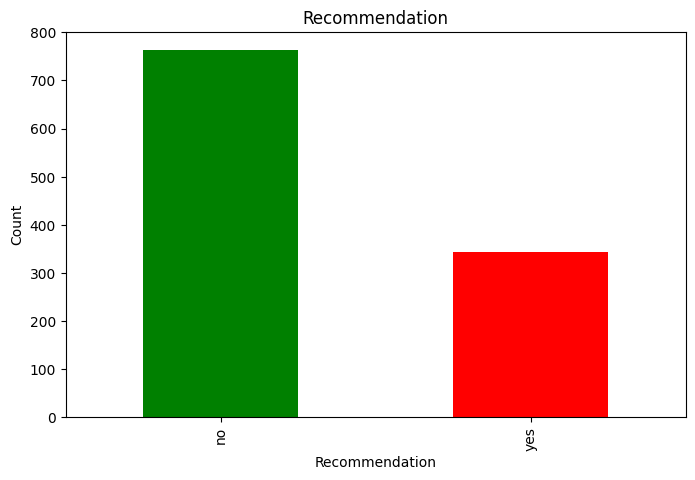

In [328]:
df['recommendation'].value_counts().plot(kind='bar', color=['green', 'red'], figsize=(8, 5), title='Recommendation')
plt.xlabel('Recommendation')
plt.ylabel('Count')

In [329]:
df.isnull().sum()

model                122
rated                122
rate                 122
reviews              122
d2                   122
d3                   122
d4                   122
battery(mAh)         126
Processor            138
gurrenty             345
selling Price(rs)    122
MRP(rs)              142
discount(%)          146
RAM                  122
ROM                  154
screen_size(cm)      122
company              122
recommendation         0
dtype: int64

In [330]:
df1=df.drop(columns=['d2','d3','d4'])

In [331]:
df1.dropna(inplace=True)
df1.isna().sum()


model                0
rated                0
rate                 0
reviews              0
battery(mAh)         0
Processor            0
gurrenty             0
selling Price(rs)    0
MRP(rs)              0
discount(%)          0
RAM                  0
ROM                  0
screen_size(cm)      0
company              0
recommendation       0
dtype: int64

In [332]:
df1.size

11205

In [333]:
df1.describe()

,rated,rate,reviews,battery(mAh),selling Price(rs),MRP(rs),discount(%),screen_size(cm)
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,4.319143,21205.542169,1295.085676,4954.151272,20955.469880,27134.598394,23.452477,16.097041
std,0.148162,42952.884778,2387.015212,1141.206599,17153.208835,20882.770427,9.147808,3.225850
min,3.700000,24.000000,0.000000,800.000000,777.000000,1349.000000,5.000000,1.680000
25%,4.200000,1245.500000,91.000000,5000.000000,10999.000000,14999.000000,17.000000,16.940000
50%,4.300000,4197.000000,325.000000,5000.000000,16499.000000,20999.000000,23.000000,16.970000
75%,4.400000,19874.000000,1433.000000,5500.000000,26749.000000,33999.000000,29.000000,17.120000
max,4.800000,450606.000000,23691.000000,6550.000000,162999.000000,172999.000000,56.000000,17.480000


Text(0.5, 1.0, 'Top 10 companies by comments by customers')

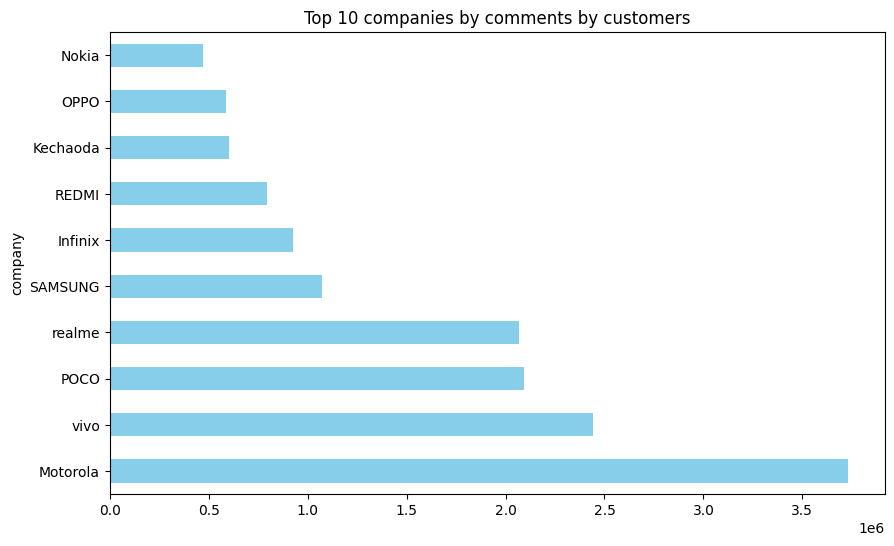

In [334]:
# top 10 companies by comments by customers

df1.groupby('company')['rate'].sum()
df1.groupby('company')['rate'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 companies by comments by customers')

Text(0.5, 1.0, 'Top 10 Mobile Companies in Flipkart')

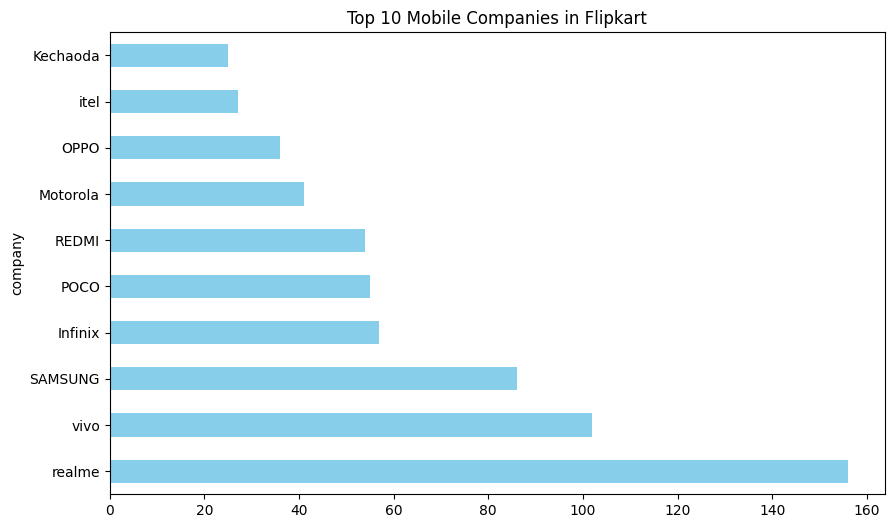

In [335]:
#  top 10 companies by size of the mobile phones
df1.groupby('company').size().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Mobile Companies in Flipkart')

In [336]:
df1['RAM'].unique()

array(['8', '4', '6', '12', '16', '3', '32', '2', '36', '48'],
      dtype=object)

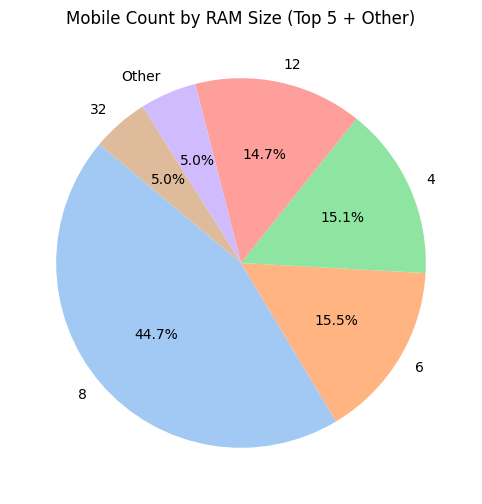

In [337]:
# Get the top 5 RAM categories
top_5_ram = df1['RAM'].value_counts().nlargest(5)

# Create a new column to group the rest as 'Other'
df1['RAM_grouped'] = df1['RAM'].apply(lambda x: x if x in top_5_ram.index else 'Other')

# Count the occurrences of each category (including 'Other')
ram_counts = df1['RAM_grouped'].value_counts()

# Plot the pie chart
ram_counts.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Mobile Count by RAM Size (Top 5 + Other)')
plt.ylabel('')  # Remove the y-axis label for better visualization
plt.show()

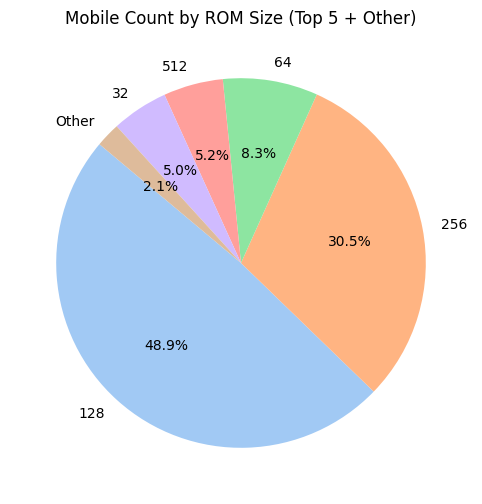

In [338]:
# Get the top 5 RAM categories
top_5_ram = df1['ROM'].value_counts().nlargest(5)
# Create a new column to group the rest as 'Other'
df1['ROM_grouped'] = df1['ROM'].apply(lambda x: x if x in top_5_ram.index else 'Other')

# Count the occurrences of each category (including 'Other')
ram_counts = df1['ROM_grouped'].value_counts()

# Plot the pie chart
ram_counts.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Mobile Count by ROM Size (Top 5 + Other)')
plt.ylabel('')  # Remove the y-axis label for better visualization
plt.show()

Text(0.5, 1.0, 'Top 10 companies by comments by customers')

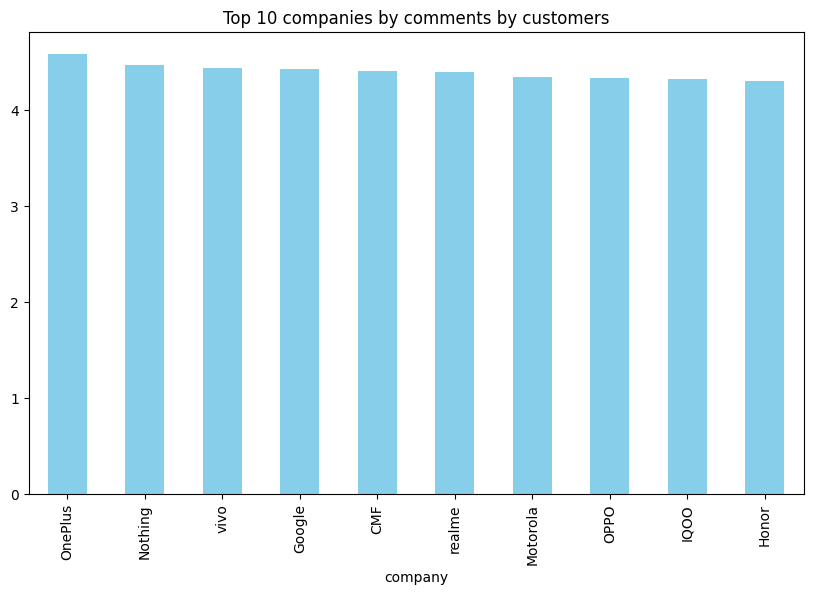

In [339]:
# top 10 companies by comments by customers

df1.groupby('company')['rated'].mean()
df1.groupby('company')['rated'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 companies by comments by customers')

<Axes: ylabel='model'>

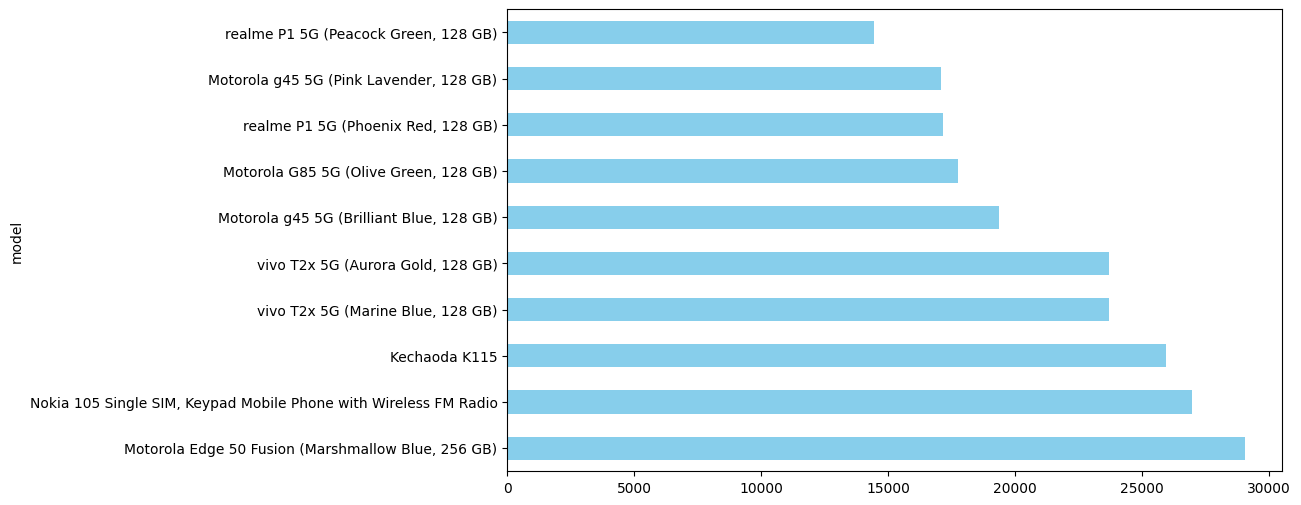

In [340]:
#  most reviewed mobile phones
df1.groupby('model')['reviews'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10, 6), color='skyblue')

In [341]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [342]:
lb=LabelEncoder()
df1['company']=lb.fit_transform(df1['company'])
df1['Processor']=lb.fit_transform(df1['Processor'])
df1['recommendation']=lb.fit_transform(df1['recommendation'])

In [343]:
df1.head(2)


,model,rated,rate,reviews,battery(mAh),Processor,gurrenty,selling Price(rs),MRP(rs),discount(%),RAM,ROM,screen_size(cm),company,recommendation,RAM_grouped,ROM_grouped
0,"Nothing Phone (3a) (Blue, 128 GB)",4.5,13020.0,1404.0,5000.0,17,1 Year Manufacturing Warranty,24999.0,27999.0,10.0,8,128,17.20,11,1,8,128
1,"POCO C71 (Desert Gold, 64 GB)",4.2,716.0,59.0,5200.0,131,1 Year Manufacturer Warranty for Phone and 6 M...,6499.0,8999.0,27.0,4,64,17.48,14,0,4,64


In [344]:
df1.isnull().sum()

model                0
rated                0
rate                 0
reviews              0
battery(mAh)         0
Processor            0
gurrenty             0
selling Price(rs)    0
MRP(rs)              0
discount(%)          0
RAM                  0
ROM                  0
screen_size(cm)      0
company              0
recommendation       0
RAM_grouped          0
ROM_grouped          0
dtype: int64

In [345]:
x=df1.drop(columns=['model','gurrenty','MRP(rs)','selling Price(rs)','ROM_grouped','RAM_grouped','recommendation','battery(mAh)'])
y=df1['MRP(rs)']

In [346]:
x.head(2)

,rated,rate,reviews,Processor,discount(%),RAM,ROM,screen_size(cm),company
0,4.5,13020.0,1404.0,17,10.0,8,128,17.20,11
1,4.2,716.0,59.0,131,27.0,4,64,17.48,14


In [347]:
# Select only numeric columns
numeric_cols = x.select_dtypes(include=['number']).columns

# Convert only numeric columns to float
x[numeric_cols] = x[numeric_cols].astype(float)

# Verify the data types
print(x.dtypes)

rated              float64
rate               float64
reviews            float64
Processor          float64
discount(%)        float64
RAM                 object
ROM                 object
screen_size(cm)    float64
company            float64
dtype: object


In [348]:
# Convert all columns to float
x = x.astype(float)

# Verify the data types
print(x.dtypes)

rated              float64
rate               float64
reviews            float64
Processor          float64
discount(%)        float64
RAM                float64
ROM                float64
screen_size(cm)    float64
company            float64
dtype: object


In [349]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)


In [350]:
from sklearn.linear_model import LinearRegression

In [351]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [352]:
y_pridt=lr.predict(x_test)

In [353]:
from sklearn.metrics import accuracy_score

In [354]:
from sklearn.metrics import r2_score

In [355]:
r2_score(y_test,y_pridt)

0.565834614865969

# Logical regression on product Recommendation

In [356]:
df1.head(2)

,model,rated,rate,reviews,battery(mAh),Processor,gurrenty,selling Price(rs),MRP(rs),discount(%),RAM,ROM,screen_size(cm),company,recommendation,RAM_grouped,ROM_grouped
0,"Nothing Phone (3a) (Blue, 128 GB)",4.5,13020.0,1404.0,5000.0,17,1 Year Manufacturing Warranty,24999.0,27999.0,10.0,8,128,17.20,11,1,8,128
1,"POCO C71 (Desert Gold, 64 GB)",4.2,716.0,59.0,5200.0,131,1 Year Manufacturer Warranty for Phone and 6 M...,6499.0,8999.0,27.0,4,64,17.48,14,0,4,64


In [357]:
x_rec=df1.drop(columns=['model','gurrenty','ROM_grouped','RAM_grouped','recommendation'])
y_rec=df1['recommendation']

In [358]:
x_rec_train, x_rec_test, y_rec_train , y_rec_test=train_test_split(x_rec,y_rec,test_size=0.2, random_state=42)

In [359]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_rec_train, y_rec_train)
y_rec_preidict=lr.predict(x_rec_test)
print('accuracy_score --> ',accuracy_score(y_rec_test,y_rec_preidict))

accuracy_score -->  0.98


C:\Users\aaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [360]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'penalty':['l1','l2','elasticnet','none'],
     'C': np.logspace(-4,4,20),
     'solver':['lbfs','newton-cg','liblinear','sag','saga'],
     'max_iter':[100,1000,2500,5000]
     }
]

clf=GridSearchCV(lr,param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)
best_clf =clf.fit(x_rec_train,y_rec_train)
best_clf.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\aaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3360 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
202 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aaa\AppData\Local\Packages\PythonSoftwareFoundatio

LogisticRegression(C=np.float64(0.0006951927961775605), max_iter=1000,
                   solver='newton-cg')

In [361]:
print(f'Accuracy -: {best_clf.score(x_rec_train,y_rec_train):.3f}')

Accuracy -: 1.000
